In [40]:
import importlib
from __imports__ import *
import data, LSTM_returns, optimization
importlib.reload(data)

<module 'data' from 'c:\\Users\\27904\\OneDrive\\桌面\\crypto\\AAA_Thursday1\\data\\__init__.py'>

In [41]:
df = data.load_asset('ETHUSDT', sampling='1d')
df = data.add_fear_and_greed(df)
# Restrict data after 2022
df = df[df.index >= '2022-01-01']
df

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,F&G,F&G category
Open time,,,,,,,,,,,
2022-01-01,3676.22,3776.45,3673.46,3765.54,154143.8968,5.747183e+08,408666,76937.9798,2.868554e+08,21.0,Extreme Fear
2022-01-02,3765.54,3857.44,3717.30,3828.27,154791.4263,5.853750e+08,450610,81170.5053,3.070566e+08,29.0,Fear
2022-01-03,3828.11,3853.09,3680.00,3765.89,236245.8586,8.929441e+08,594541,114525.6299,4.330844e+08,29.0,Fear
2022-01-04,3765.89,3900.73,3713.11,3785.11,288258.5549,1.098183e+09,676651,147451.4285,5.619582e+08,23.0,Extreme Fear
2022-01-05,3785.10,3848.00,3415.00,3540.63,397942.0363,1.464819e+09,962670,183641.1134,6.766633e+08,24.0,Extreme Fear
...,...,...,...,...,...,...,...,...,...,...,...
2025-03-27,2009.52,2037.38,1987.06,2003.66,360634.8383,7.263856e+08,1394730,154040.2327,3.102916e+08,40.0,Fear
2025-03-28,2003.67,2015.93,1860.00,1896.90,626167.5832,1.197329e+09,2245087,307332.2769,5.876069e+08,44.0,Fear
2025-03-29,1896.90,1913.60,1797.20,1828.08,409769.7555,7.585453e+08,1755638,199201.1398,3.687527e+08,26.0,Fear


<Figure size 1200x600 with 0 Axes>

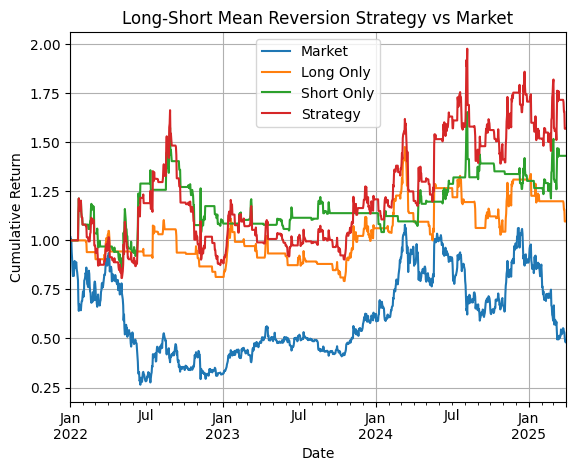

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load df
price = df['Close']

# Calculate Moving Average and Standard Deviation
window = 20
moving_avg = price.rolling(window=window).mean()
moving_std = price.rolling(window=window).std()

df['Position'] = 0
df.loc[z_score < -1, 'Position'] = -1    # Long
df.loc[z_score > 1, 'Position'] = 1     # Short

# Shift position for realistic execution
df['Position'] = df['Position'].shift(1)

# Calculate returns
df['Market Return'] = price.pct_change()
df['Long Return'] = (df['Position'] == 1).astype(int) * df['Market Return']
df['Short Return'] = (df['Position'] == -1).astype(int) * (-df['Market Return'])
df['Strategy Return'] = df['Position'] * df['Market Return']

# Cumulative returns
cumulative_returns = (1 + df[['Market Return', 'Long Return', 'Short Return', 'Strategy Return']]).cumprod()

# Plot
plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title('Long-Short Mean Reversion Strategy vs Market')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend(['Market', 'Long Only', 'Short Only', 'Strategy'])
plt.grid(True)
plt.show()

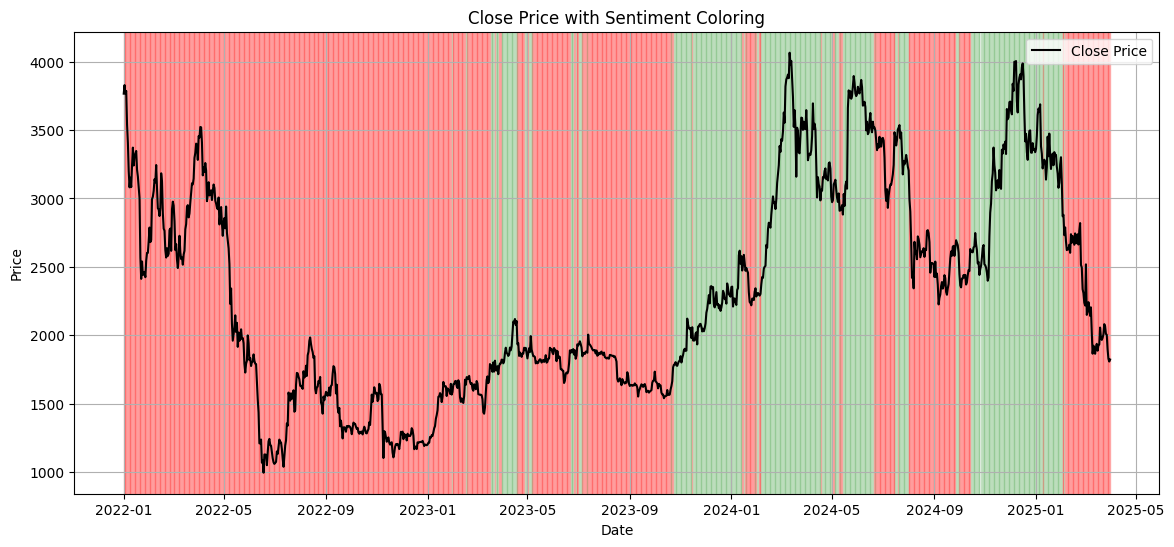

In [43]:
fear_threshold = 60
greed_threshold = 40

fig, ax = plt.subplots(figsize=(14,6))

# Plot Close price
ax.plot(df.index, df['Close'], label='Close Price', color='black')

# Color background by sentiment
for idx in range(len(df)):
    if df['F&G'].iloc[idx] <= fear_threshold:
        ax.axvspan(df.index[idx], df.index[idx], color='red', alpha=0.3)
    elif df['F&G'].iloc[idx] >= greed_threshold:
        ax.axvspan(df.index[idx], df.index[idx], color='green', alpha=0.2)
    else:
        ax.axvspan(df.index[idx], df.index[idx], color='grey', alpha=0.05)

# Decorations
plt.title('Close Price with Sentiment Coloring')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()